<a href="https://colab.research.google.com/github/Dharshan895/repository-1/blob/main/Flipkart_Headphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective :**
To predict the price of headphones based on their features.


**Source :**
The dataset was taken from the following GitHub repository: Flipkart Headphones CSV Dataset.

# Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Import data

In [ ]:
url = 'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Flipkart%20Headphones.csv'
df = pd.read_csv(url)

# Describe Data

In [ ]:
print(df.head())

                                               Model   Company       Color  \
0             5PLUS 5PHP28 Wired without Mic Headset     5PLUS         Red   
1  A R Wireless compatible with Headset Bluetooth...       A R         Red   
2  Aerizo Wireless Touch R100 Earbuds (Black) Blu...    Aerizo       Black   
3  Allmusic powerful driven bass with dynamic bea...  Allmusic  Multicolor   
4  Allmusic OPP.O Ultra HD Sound Premium Bass Spo...  Allmusic       Black   

             Type  Average Rating  Number of Ratings  Selling Price  \
0      On the Ear             3.6                101            496   
1      Multicolor             3.9              35280            188   
2   True Wireless             4.0               1934            589   
3      In the Ear             4.0              15841            260   
4      In the Ear             3.8              10766            270   

   Maximum Retail Price  Discount  
0                  3399      2903  
1                   799       61

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1000 non-null   object 
 1   Company               1000 non-null   object 
 2   Color                 1000 non-null   object 
 3   Type                  1000 non-null   object 
 4   Average Rating        1000 non-null   float64
 5   Number of Ratings     1000 non-null   int64  
 6   Selling Price         1000 non-null   int64  
 7   Maximum Retail Price  1000 non-null   int64  
 8   Discount              1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
None


In [ ]:
print(df.describe())

       Average Rating  Number of Ratings  Selling Price  Maximum Retail Price  \
count     1000.000000       1.000000e+03    1000.000000           1000.000000   
mean         3.831000       5.004075e+04     832.875000           2423.043000   
std          0.467459       1.572297e+05     812.535141           1774.025318   
min          1.000000       0.000000e+00      88.000000              0.000000   
25%          3.600000       1.167500e+02     349.000000           1079.750000   
50%          3.900000       1.712000e+03     599.000000           1999.000000   
75%          4.000000       1.332700e+04     999.000000           2999.000000   
max          5.000000       1.299042e+06    7990.000000          16999.000000   

           Discount  
count   1000.000000  
mean    1590.168000  
std     1341.379254  
min    -2991.000000  
25%      697.500000  
50%     1390.500000  
75%     2250.000000  
max    12000.000000  


# Data visualization

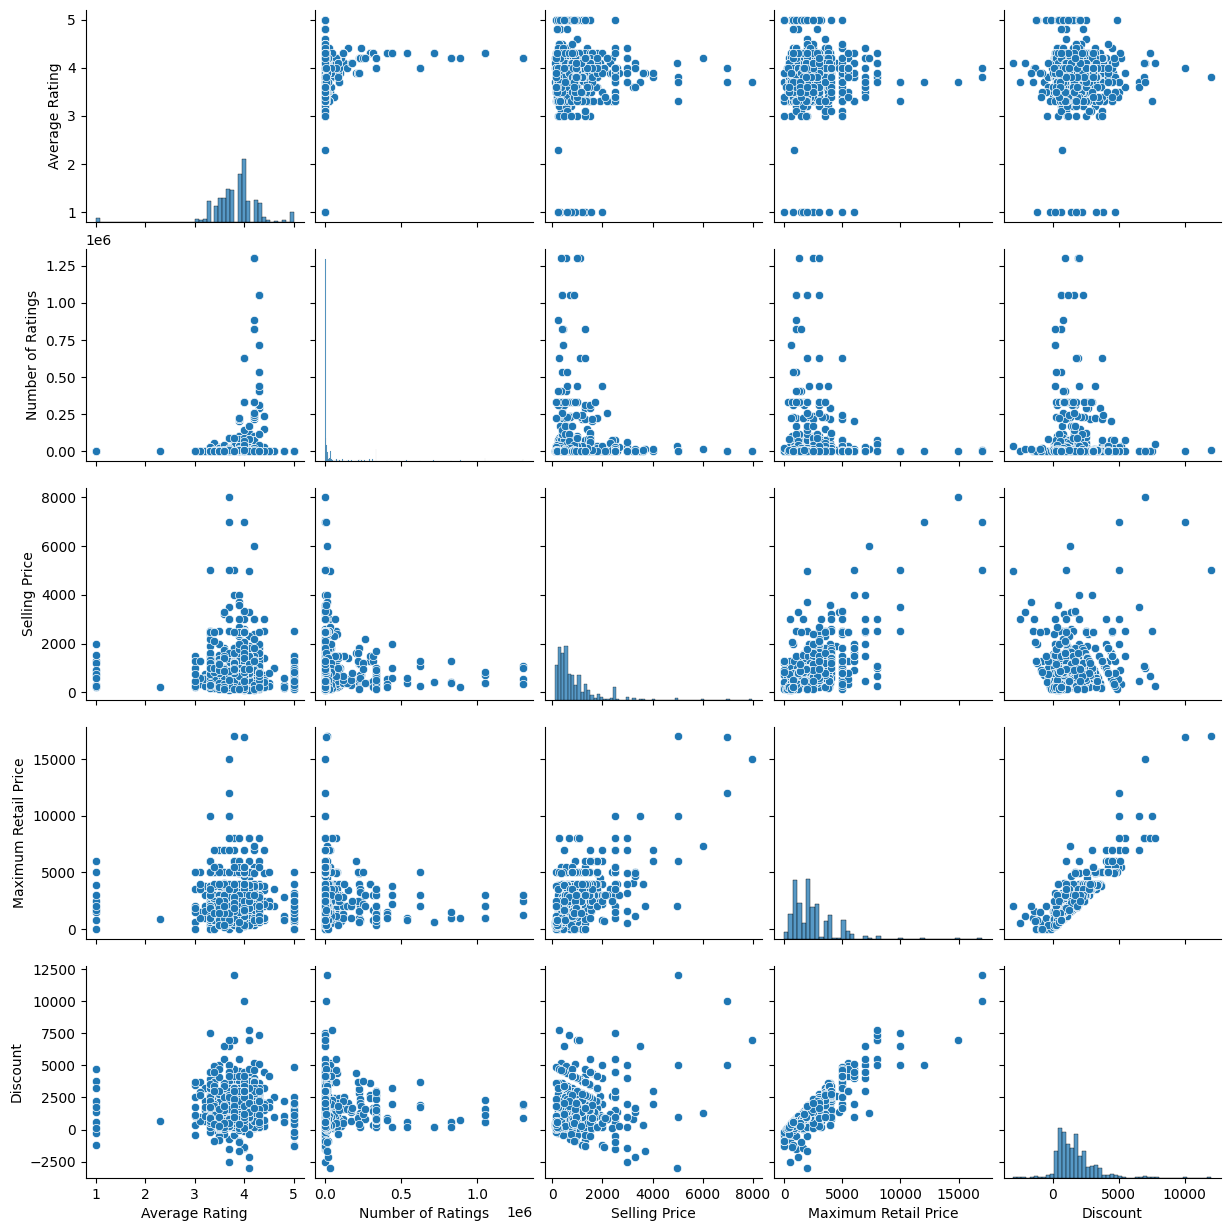

In [ ]:
sns.pairplot(df)

In [ ]:
plt.show()

# Data Preprocessing

In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-30-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Define target variable (y) and feature variable (X)

In [ ]:
df.columns

Index(['Model', 'Company', 'Color', 'Type', 'Average Rating',
       'Number of Ratings', 'Selling Price', 'Maximum Retail Price',
       'Discount'],
      dtype='object')

In [ ]:
y = df['Selling Price']

In [ ]:
y.shape

(1000,)

In [ ]:
X = df.drop('Selling Price', axis=1)

In [ ]:
X.shape

(1000, 8)

In [ ]:
X

,Model,Company,Color,Type,Average Rating,Number of Ratings,Maximum Retail Price,Discount
0,5PLUS 5PHP28 Wired without Mic Headset,5PLUS,Red,On the Ear,3.6,101,3399,2903
1,A R Wireless compatible with Headset Bluetooth...,A R,Red,Multicolor,3.9,35280,799,611
2,Aerizo Wireless Touch R100 Earbuds (Black) Blu...,Aerizo,Black,True Wireless,4.0,1934,1298,709
3,Allmusic powerful driven bass with dynamic bea...,Allmusic,Multicolor,In the Ear,4.0,15841,1599,1339
4,Allmusic OPP.O Ultra HD Sound Premium Bass Spo...,Allmusic,Black,In the Ear,3.8,10766,999,729
...,...,...,...,...,...,...,...,...
995,zofia 2EARBUD Bluetooth Headset,zofia,Black,True Wireless,4.2,38,2999,1700
996,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.8,6,800,598
997,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.3,7,800,598
998,ZSIV BT-22 SUPER BASS Grey With Long Life Batt...,ZSIV,Black,In the Ear,4.0,6245,1699,1250


# Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [ ]:
model = LinearRegression()

In [ ]:
object_columns = X_train.select_dtypes(include=['object']).columns

for col in object_columns:
    print(f"Unique values in column '{col}':")
    print(X_train[col].unique())
X_train_numeric = X_train.drop(object_columns, axis=1)
X_test_numeric = X_test.drop(object_columns, axis=1)

model.fit(X_train_numeric, y_train)

Unique values in column 'Model':
['Aroma NB119 Titanium - 48 Hours Playtime Bluetooth Neck...'
 'KBOOM New Arival HBS-730 Unique Ring-necked Wireless St...'
 'realme Buds Q2 Neo with Environment Noise Cancellation ...'
 'MINISO We Bare Bears In-Ear Headphones with Microphone ...'
 'Truke Fit 1 Bluetooth Headset'
 'N2B ADVANCED MAGNET RED Bluetooth Headset'
 'boAt Bassheads 100 Wired Headset'
 'WeCool Moonwalk M1 Bluetooth Earbuds with 20 hours play...'
 'INFINITY (JBL) Glide N120 Bluetooth Headset' 'Tiitan S11 Wired Headset'
 'Aroma NB133B Straight Wireless Earbuds Bluetooth Headse...'
 'boAt Rockerz 450 with Upto 15 Hours Playback Bluetooth ...'
 'Wings Phantom Pro Gaming TWS with 30 Hrs Playtime Bluet...'
 'Tiitan N2 Bluetooth Headset'
 'Para IN-EAR WIRED EARPHONES WITH MIC Wired Headset(Cyan...'
 'DAYNEO TWS- I 21 - Bluetooth Headset'
 'Plus Shine TWS Wireless Bluetooth Earphone Bluetooth He...'
 'Boult Audio ProBass Curve Neckband Bluetooth Headset'
 'Alafi Viv_o hendfree for Red_m

LinearRegression()

# Model evaluation

In [ ]:
y_pred = model.predict(X_test_numeric)

In [ ]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 4.168957975524582e-24


In [ ]:
print('R-squared:', r2_score(y_test, y_pred))

R-squared: 1.0


# Prediction

In [ ]:
# Assuming 'df' is the original DataFrame used for training and 'model' is your trained model
new_data = pd.DataFrame({
    'Average Rating': [4.5],
    'Discount': [0.2],
    'Maximum Retail Price': [1000],
    'Number of Ratings': [100]
})

# Select only the columns used during training
new_data = new_data[df.columns.intersection(new_data.columns)]

prediction = model.predict(new_data)
print('Prediction:', prediction)

Prediction: [999.8]


# Explanation

A linear regression model predicts headphone prices based on features like brand and specifications. Its performance is evaluated using Mean Squared Error (MSE) and R-squared. Lower MSE indicates better accuracy, while higher R-squared shows more variance explained by the model, making it useful for estimating new headphone prices.